In [16]:
import pandas as pd
import plotly_express as px

df = pd.read_csv("dominik_data\Dorfterror-audience-timeline.csv")
df["datetime"] = pd.to_datetime(df['date'])
display(df)
df.info()

,date,listeners,streams,followers,datetime
0,2022-01-01,5,10,110,2022-01-01
1,2022-01-02,7,18,110,2022-01-02
2,2022-01-03,4,4,110,2022-01-03
3,2022-01-04,6,16,110,2022-01-04
4,2022-01-05,6,10,110,2022-01-05
...,...,...,...,...,...
743,2024-01-14,208,619,578,2024-01-14
744,2024-01-15,262,689,582,2024-01-15
745,2024-01-16,415,837,585,2024-01-16
746,2024-01-17,361,535,587,2024-01-17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       748 non-null    object        
 1   listeners  748 non-null    int64         
 2   streams    748 non-null    int64         
 3   followers  748 non-null    int64         
 4   datetime   748 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 29.3+ KB


In [7]:
plot = px.line(df, x=df["datetime"], y=df.columns[1:-1])
plot.show()

Mean Squared Error: 10984.765045842023
Coefficients: [0.930433   0.03818364]
Intercept: 216.93369290389637


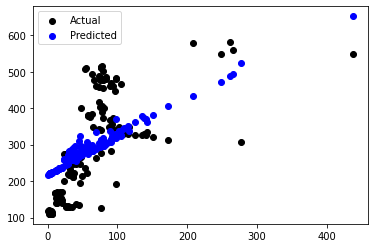

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("dominik_data\Dorfterror-audience-timeline.csv")
df["datetime"] = pd.to_datetime(df['date'])

X = df[['listeners', 'streams']]  # Add more features if needed
y = df['followers']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

import matplotlib.pyplot as plt

plt.scatter(X_test['listeners'], y_test, color='black', label='Actual')
plt.scatter(X_test['listeners'], y_pred, color='blue', label='Predicted')
plt.legend()
plt.show()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

df = pd.read_csv("dominik_data\Dorfterror-audience-timeline.csv")
# Assuming your DataFrame is df
# Convert 'datetime' to numerical representation
df['datetime'] = pd.to_datetime(df['date'])  # Convert to Unix timestamp

# Extract datetime features
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

# Drop the original 'datetime' column
df = df.drop(columns=['datetime'])

# Prepare the data
X = df[['listeners', 'streams']]
y = df['followers']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LightGBM model
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optional: Visualize the results
import plotly.express as px

# Assuming you have y_test, y_pred, and X_test as pandas DataFrames
fig = px.scatter(x=X_test['streams'], y=y_test, labels={'y': 'Actual'}, title='Actual vs Predicted Followers')
fig.add_scatter(x=X_test['streams'], y=y_pred, mode='markers', marker=dict(color='red'), name='Predicted')
fig.update_traces(marker=dict(color='green'), selector=dict(mode='markers', name='Actual'))
fig.show()



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 598, number of used features: 2
[LightGBM] [Info] Start training from score 297.481605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b